In [3]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [82]:
kegg = read.csv('./KEGG_COMPOUND_PATHWAY_mmu.csv')

In [83]:
kegg = kegg %>% filter(grepl('Biosynthesis of unsaturated fatty acids',PATHWAY_MAP))

In [84]:
id = kegg$COMPOUND

In [85]:
cnumber = read.csv('./cnumber.csv')

In [86]:
lipid = cnumber[cnumber$kegg %in% id,]

In [87]:
metalipid = lipid$Metabolites

In [88]:
koclp.r = read.csv('./6.otu-metabolite-luming/KO.CLP.cor.r.csv',row.names = 1)

In [89]:
koclp.p = read.csv('./6.otu-metabolite-luming/KO.CLP.cor.p.csv',row.names = 1)

In [90]:
head(koclp.r,2)

,g__Akkermansia_s__Akkermansia_muciniphila,g__Bacteroides_s__Bacteroides_caecimuris,g__Helicobacter_s__Helicobacter_hepaticus,g__Acutalibacter_s__Acutalibacter_muris,g__Lachnoclostridium_s__Lachnoclostridium_sp..YL32,g__Muribaculum_s__Muribaculum_sp..TLL.A4,g__Muribaculum_s__Muribaculum_sp..H5,g__Muribaculum_s__Muribaculum_intestinale,g__Duncaniella_s__Duncaniella_sp..B8,g__Lactobacillus_s__Lactobacillus_murinus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"LysoPC(20:4(5Z,8Z,11Z,14Z))",0,0,0,0,0,0,0,0,0,0
LysoPC(18:0),0,0,0,0,0,0,0,0,0,0


In [91]:
r  = koclp.r[metalipid,]

In [92]:
p  = koclp.p[metalipid,]

In [93]:
dim(r)

[1] 19 10

In [94]:
cmt = t(r);pmt =t(p)

In [95]:
library(reshape2)

In [96]:
df <-melt(cmt,value.name= "cor")

In [97]:
df$pvalue <- as.vector(pmt)

In [98]:
if(!is.null(pmt)){
    ssmt <- pmt< 0.01
    pmt[ssmt] <- '**'
    smt <- pmt > 0.01& pmt < 0.05
    pmt[smt] <- '*'
    pmt[!ssmt&!smt]<- ''
    } else{
    pmt <- F
    }

In [99]:
library(pheatmap)

In [100]:
kind = c('g__Akkermansia_s__Akkermansia_muciniphila',
'g__Bacteroides_s__Bacteroides_caecimuris',
'g__Helicobacter_s__Helicobacter_hepaticus',
'g__Acutalibacter_s__Acutalibacter_muris',
'g__Lachnoclostridium_s__Lachnoclostridium_sp..YL32'
)

bad = c('g__Muribaculum_s__Muribaculum_sp..TLL.A4',
'g__Muribaculum_s__Muribaculum_sp..H5',
'g__Muribaculum_s__Muribaculum_intestinale',
'g__Duncaniella_s__Duncaniella_sp..B8',
'g__Lactobacillus_s__Lactobacillus_murinus'
)

In [101]:
dd = as.data.frame(c(kind,bad))

In [102]:
dd$type = c(rep('kind',5),rep('bad',5))

In [103]:
dd = dd %>% tibble::column_to_rownames(.,'c(kind, bad)')

In [104]:
dd

,type
,<chr>
g__Akkermansia_s__Akkermansia_muciniphila,kind
g__Bacteroides_s__Bacteroides_caecimuris,kind
g__Helicobacter_s__Helicobacter_hepaticus,kind
g__Acutalibacter_s__Acutalibacter_muris,kind
g__Lachnoclostridium_s__Lachnoclostridium_sp..YL32,kind
g__Muribaculum_s__Muribaculum_sp..TLL.A4,bad
g__Muribaculum_s__Muribaculum_sp..H5,bad
g__Muribaculum_s__Muribaculum_intestinale,bad
g__Duncaniella_s__Duncaniella_sp..B8,bad


In [105]:
cmt1 = cmt[,colSums(cmt == 0) < nrow(cmt)]

In [106]:
pmt1 = pmt[,colnames(cmt1)]

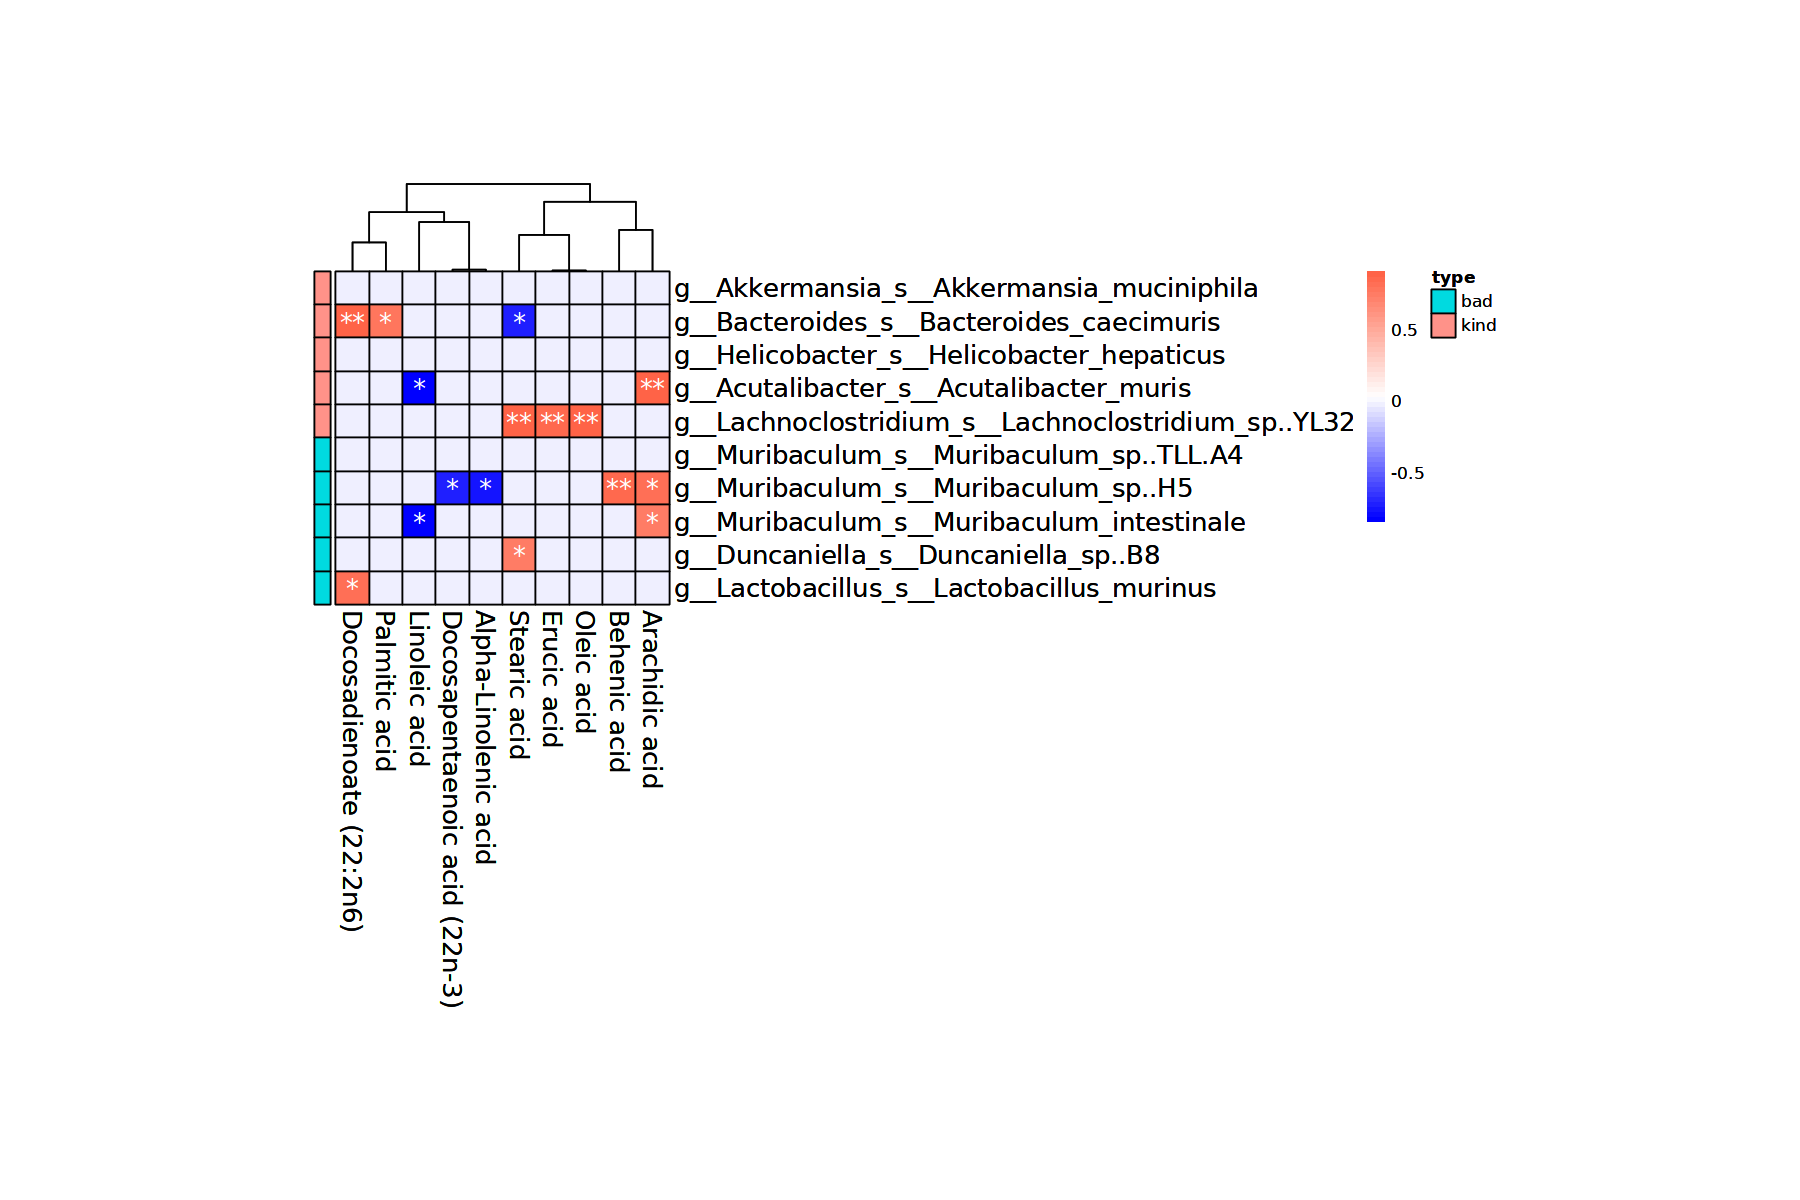

In [107]:
 mycol<-colorRampPalette(c("blue","white","tomato"))(50)
    options(repr.plot.height = 10,repr.plot.width = 15)
    p = pheatmap(cmt1,scale = "none",cluster_row = F, cluster_col = T, border='black',
    display_numbers = pmt1,fontsize_number = 15, number_color = "white", fontsize_row = 15,  fontsize_col = 15,annotation_names_row =F,
    cellwidth = 20, cellheight =20,color=mycol, annotation_row = dd )
    
    print(p)